# Fundamentals of Statistics Unit 2 Notes (unfinished)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
import warnings
from IPython.display import display, HTML
warnings.filterwarnings('ignore')

# 'Trinity of Statistical Inference'

### 1. Estimation
- $\hat{p}$ estimates some proportion $p$, like the proportion of people of people who turn their head to the right when kissing. 
- In general, $\hat{\theta}$ is the estimate of some parameter $\theta$ in realization, and $\hat{\Theta}$ is the estimator of some parameter $\Theta$ in distribution.

### 2. Confidence Intervals
- An interval around the parameter estimate at any self-determined confidence level $1 - \alpha$, $\alpha \in [0, 1]$
- If normal distribution (which all estimators converge to), $P(\bar{X} + \Phi^{-1}(\alpha/2)\frac{\sigma}{\sqrt{n}} < \mu < \bar{X} - \Phi^{-1}(\alpha/2)\frac{\sigma}{\sqrt{n}}) = 1 - \alpha$ where $\mu$ is the parameter being estimated and $\bar{X}$ is the estimator. 
- CI is then [$\bar{X} + \Phi^{-1}(\alpha/2)\frac{\sigma}{\sqrt{n}}$, $\bar{X} - \Phi^{-1}(\alpha/2)\frac{\sigma}{\sqrt{n}}$] 
- NOTE: conventions of estimator & estimation notation can be confusing. $\bar{X}$ is the sample mean before and after realization. So, $\bar{X}$ can refer to both the estimator RV and the estimation. Same goes for $\hat{p}$ (or $\bar{R}_n$ in the lecture). To differentiate between estimation and estimator, you could use $\bar{x}$ and $\bar{X}$, or the more general $\hat{\theta}$ and $\hat{\Theta}$.
- Using a strict frequentist interpretation, once realized, a confidence interval is no longer a probability statement, but a statement of *confidence*.  That is, the number of CI's that capture $\theta$ at confidence level $1 - \alpha$ converges to $\alpha * 100$ as $n \to \infty$, n being the number of repeat experiments. Increasing sample size per experiment has the same effect. (cont'd on Footnote 1)

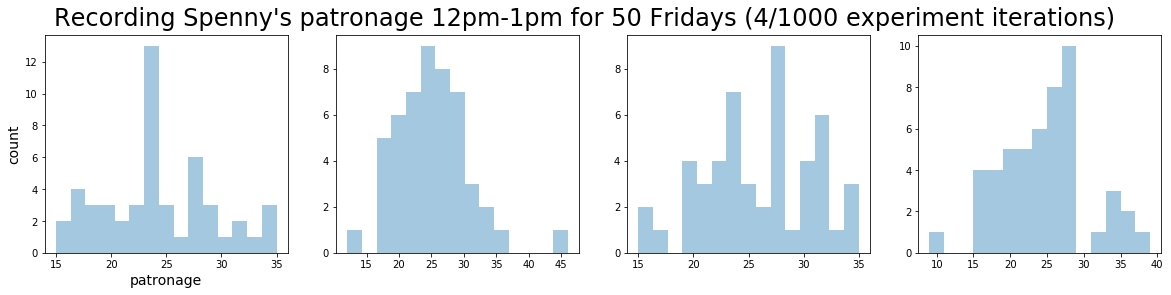

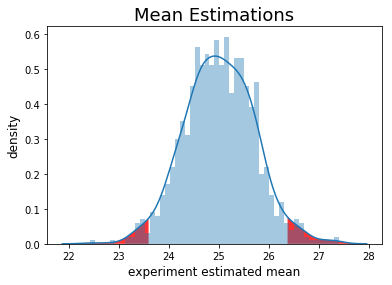

In [2]:
# Estimating the mean number of people who arrive at a Spenny's on Friday between 12pm and 1pm by 
# recording patronage for 50 consecutive Fridays (n=50). Experiment is repeated 1000 times.
# Poisson may not be the right model, since I'm getting number of people who arrived on a day
# rather than time between arrivals. But, that doesn't hurt the example.

n = 50 
mean = 25
experiment_count = 1000
samples = np.array([np.random.poisson(mean, n) for i in range(experiment_count)])
sample_means = np.mean(samples, axis=1)
est_stds = \
    np.sqrt(
        1 / n * np.sum(np.square([samples[i] - sample_means[i] for i in range(experiment_count)]), 
                       axis=1)
    ) 

fig = plt.figure(figsize=(20,4))
fig.suptitle("Recording Spenny's patronage 12pm-1pm for 50 Fridays (4/1000 experiment iterations)", fontsize=24)
for i in range(4):
    plt.subplot(1, 4, i+1)
    if i == 0:
        plt.xlabel('patronage', fontsize=14)
        plt.ylabel('count', fontsize=14)
    sns.distplot(samples[i], kde=False, bins=15)
plt.show()


# a = 0.05, Phi^-1(0.05/2) = -1.96  if a=0.05, Confidence level = 0.95. We expect to see roughly 5% of 
# CI's fail to capture the true mean. The proportion converges to 0.05 as n -> infinity.

proportion_bad_CIs = (np.sum(sample_means - 1.96 * est_stds / np.sqrt(n) > mean) \
    + np.sum(sample_means + 1.96 * est_stds / np.sqrt(n) < mean)) \
    / experiment_count

plt.title('Mean Estimations', fontsize=18)
plt.xlabel('experiment estimated mean', fontsize=12)
plt.ylabel('density', fontsize=12)
ax = sns.distplot(sample_means, bins=50)
x, y = ax.get_lines()[-1].get_data()
mask = x < mean - 1.96 * np.mean(est_stds) / np.sqrt(n) 
x_1, y_1 = x[mask], y[mask]
ax.fill_between(x_1, y1=y_1, facecolor='red', alpha=0.8)
mask = x > mean + 1.96 * np.mean(est_stds) / np.sqrt(n)
x_2, y_2 = x[mask], y[mask]
ax.fill_between(x_2, y1=y_2, facecolor='red', alpha=0.8)
plt.show()

ci_l = sample_means[0] - 1.96 * est_stds[0] / np.sqrt(n) 
ci_r = sample_means[0] + 1.96 * est_stds[0] / np.sqrt(n)
captured = ci_l < mean and ci_r > mean
    
cap_or_not = 'captured' if captured else 'did not capture'
display(HTML('<h4>The mean estimations in red had CIs that failed to capture the true mean at 95% confidence</h4>'))
display(HTML(f'<h4> Proportion of CIs that fail to capture the mean at $alpha = 0.05$: {proportion_bad_CIs}</h4>\n' \
            + '(the proportion will converge to 0.05 as n goes to infinity)'))
display(HTML(f'<h4> If the first experiment was the only one, we {cap_or_not} the mean 25\n' \
             f'in our confidence interval [{ci_l:.2f}, {ci_r:.2f}]</h4>'))

### 3. Hypothesis Testing
- Testing whether or not a random variable/process follows a distribution in a space of distributions that prove a hypothesis.
- For example, if $\hat{p} = 0.645$, and the 95% CI is $[0.49, 0.8]$, you can't conclude with 95% confidence that $p > 0.5$ - statistical evidence that $p$ isn't a majority. The space of distributions that proves the hypothesis of a majority has $p$ at greater than $0.5$. 

# Statistical Modeling 

### Simplification
- uncomplicated: Let $X_1, ..., X_n$ be $n$ iid copies of $X \in \{0, 1\}$. That is, $X \sim Bernoulli(p)$, because there is only one unkown: $p$
- complicated: dataset of of number of siblings people have:

| x | 0 | 1 | 2 | 3 | 4 | 5 | 6 | $\geq$ 7 |
|---|---|---|---|---|---|---|---|---|
|$P(X = x)$|$p_0$|$p_1$|$p_2$|$p_3$|$p_4$|$p_5$|$p_6$|$\sum_{i\geq7}p_i$|

... gives 7 parameters to learn (1 known after rest are learned)
- Less complicated: assume $X - 1 \sim Poisson(\lambda)$, where $P(X = x) = \frac{\lambda^x}{x!}e^{-\lambda}$, giving 1 parameter to learn! 
- Rule of thumb: 2 parameters = 2 times observations needed

,p0,p1,p2,p3,p4,p5,p6,p>=7
P(X = x),0.2172,0.345,0.2428,0.1258,0.0492,0.016,0.003,0.002


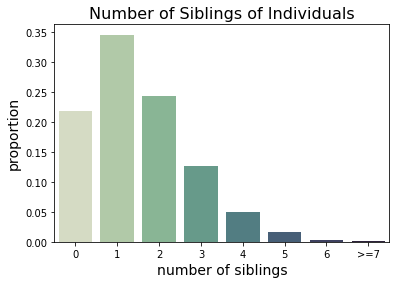

In [3]:
# Working backwards from a Poisson here because it's easier.
mean =  1.5
n = 5000
pois = pd.DataFrame({'P(X = x)':np.random.poisson(mean, 5000)})['P(X = x)'].value_counts() / n
pois.loc[7] += pois.loc[7:pois.shape[0] - 1].sum()
pois = pois.loc[:7]
pois.rename(index={0:'p0', 1:'p1', 2:'p2', 3:'p3', 4:'p4', 5:'p5', 6:'p6', 7:'p>=7'}, inplace=True)
pois = pois.sort_index()

display(HTML('<h4> $X \in \{1,2,...,\geq7\}$, 8 parameters </h4>'))
display(HTML(pd.DataFrame(pois).transpose().to_html()))
display(HTML('<h4> Poisson RV, 1 parameter </h4>'))
display(HTML('$Poisson(\lambda = 1.5)$'))
display(HTML('<h4> Same Distribution </h4>'))

plt.figure(figsize=(6,4))
plt.title('Number of Siblings of Individuals',fontsize=16)
sns.barplot(pois.index, pois, palette=sns.cubehelix_palette(8, start=.5, rot=-.75))
plt.ylabel('proportion', fontsize=14)
plt.xlabel('number of siblings', fontsize=14)
plt.xticks([i for i in range(8)], [f'{i}' if i < 7 else f'>={i}' for i in range(8)])

plt.show()

### Formal Definition 

Let the observed outcome of a statistical experiment be a sample $X_1, ..., X_n$ of n iid random variables in some measurable space $E$ (usually $E \subseteq R$) and denote by $P$ their common distribution. A statistical model associated to that statistical experiment is a pair:

- $(E, (P_\theta)_{\theta \in \Theta}$),

where

- $E$ is called <b>sample space</b>
- $(P_\theta)_{\theta \in \Theta}$ is a <b>family of probability distributions</b> on E
- $\Theta$ is any set, called <b>parameter set</b>

Examples:
- ($\{0, 1\}$, $(Ber(p))_{p \in (0, 1)}$)
- ($\mathbb{N}$, $(Pois(\lambda))_{\lambda > 0})$)
- ($\mathbb{R}$, $(\mathcal{N}(\mu, \sigma^2))_{(\mu, \sigma^2) \in \mathbb{R} x (0, \infty)})$

Sample space can't depend on a parameter. The sample space can, however, be less precise than is desirable. $\mathbb{R}$ for Poisson is true, but overkill for a parameter that must be an integer greater than 0.

### Parametric, nonparametric and semiparametric models

Usually we assume the statistical model is well specified, meaning we know the distribution of an RV (e.g. Bernoulli(p)) lies within a specified family (e.g. Bernoulli), in the space of all probability distributions.


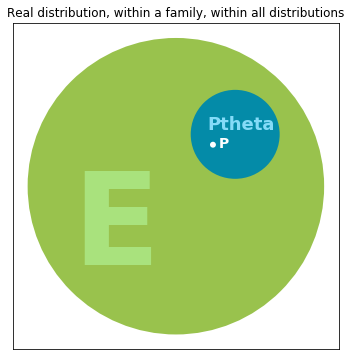

In [4]:
plt.figure(figsize=(6,6))
plt.title('Real distribution, within a family, within all distributions')
E = plt.Circle((0, 0), radius=1, fc='#99c24d')
P_theta = plt.Circle((0.4, 0.35), radius = 0.3, fc='#048ba8')
P = plt.Circle((0.25, 0.28), radius=0.02, fc='w')
plt.gca().add_patch(E)
plt.gca().add_patch(P_theta)
plt.gca().add_patch(P)
plt.text(0.29, 0.26, 'P', color='w', fontsize=14, fontweight=900)
plt.text(-0.7, -0.53, 'E', color='#a9e27d', fontsize=128, fontweight=900)
plt.text(0.21, 0.38, 'Ptheta', color='#84dbf8', fontsize=18, fontweight=900)
plt.axis('scaled')
plt.yticks([])
plt.xticks([])
plt.show()

- Note: $\mathbb{R}^d$ means d-length vector of real numbers.
- The parameter $\theta$ defining our distribution is called the 'true parameter', and is unknown. Our aim is to find $\theta$ or see if it passes tests (e.g. $\theta > 2$ or $\theta \neq 1/2$)
- Here, $\Theta$ is the space of parameterizations for distribution family $P_\theta$, and $\theta$ is a parameterization, or vector of parameters that defines a single distribution (as p=0.7 defines Bernoulli(0.7)). 'Parameter' and 'parameterization/vector of parameters' are seemingly named interchangeably by $\theta$.
- The model is <b>parametric</b> if $\Theta \subseteq \mathbb{R}^d$ for some $d \geq 1$. Meaning, the family of distributions can be described with a finite number of parameters. The normal family is parameterized by $\theta = (\mu, \sigma^2)$. 
- The model is <b>nonparametric</b> if $\Theta$ is infinite-dimensional.
- The model is <b>semiparametric</b> if $\Theta = \Theta_1$ x $\Theta_2$, where $\Theta_1$ is finite-dimensional and $\Theta_2$ is infinite-dimensional.

# Statistical Model Examples

### Linear Regression Model

Generally used to find relationships between variables (how $X$ affects $Y$), and/or to predict outcomes (what combinations of $X$ in higher orders ($X, X^2, X^3$) can be used to predict $Y$?)

If $(X_1, Y_1), ..., (X_n, Y_n) \in \mathbb{R}^d \times \mathbb{R}$ are iid in the model 

- $Y_i = \beta^T X_i + \epsilon_i$

Where:

- $\epsilon_i \overset{iid}{\sim}\mathcal{N}(0,1)$
- unknown $\beta \in \mathbb{R}^d$
- $X_i \sim \mathcal{N}_d(0, I_d)$ independent of $\epsilon_i$
- $E = \mathbb{R}^d \times \mathbb{R}$
- $\Theta = \mathbb{R}^d$
- Note: where $\beta^T X_i$ represents the vector $\beta$ multiplied by the vector $X_i$, usually the first element of $X_i$ is a 1, since $\beta_0$ usually represents the y-intercept. A simple linear model is $Y = \beta X + \beta_0 + \epsilon$, where $Y$ is the random mirror of $y$ in $y = mx + b$.

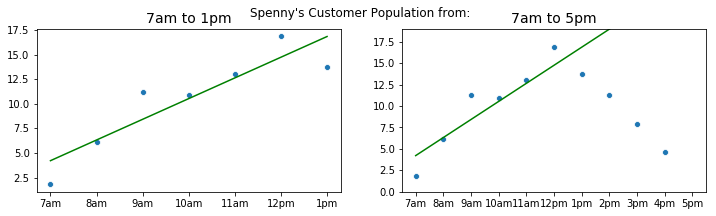

        Actual  Estimated
beta_0     0.5       4.22
beta_1     5.0       2.10
beta_2    -0.5       0.00

The estimated parameters are off because outside of the range of our estimation,
 f(x) looks very different.
You could say, however, that customer population is modeled well with a simple
 linear model between 7am and 1pm.
There will be many times when you don't know what's beyond 1pm and this model works
 fine anyway, even if adding a higher order parameter would predict a little better.
This simpler approach is often useful for explaining how one variable affects another,
 where adding higher order parameters convolutes the message.
If you want to predict # of customers rather than figure out the relationship between
 hours and customers, adding beta_2 * X^2 is a good idea.


In [147]:
# I'm not 100% clear on the concept of linear regression presented above, but my sim here
# represents linear regression in a form.

# X from 0 to 10 represents hours 7am to 5pm, open to close. (weird hours, sure)
X = np.arange(0, 11, 1)

# unknown parameters
beta_0 = 0.5
beta_1 = 5
# beta_2 is an unknown parameter that gives a slight curve, but we're ignoring because this domain
# of X has f(X) modeled well enough linearly
beta_2 = -0.5 

# I usually simulate error with a variance > 1. I'm not sure why class slides have N(0, 1) for error,
# but that will probably be explained later in class.
error = np.random.normal(0, 2, 11)
Y = beta_0 + beta_1 * X + beta_2 * X**2 + error

# This is a closed form solution to finding beta_1 and beta_0 without bias
# in our desired estimation domain 7am to 1pm
est_beta_1 = np.sum((X[:7] - np.mean(X[:7])) * (Y[:7] - np.mean(Y[:7]))) / np.sum((X[:7] - np.mean(X[:7]))**2)
est_beta_0 = np.mean(Y[:7]) - est_beta_1 * np.mean(X[:7])

figure(figsize=(12,3))
plt.suptitle('Spenny\'s Customer Population from:')
plt.subplot(1, 2, 1)
plt.title('7am to 1pm', fontsize=14)
sns.scatterplot(X[:7], Y[:7])
sns.lineplot(X[:7], est_beta_0 + est_beta_1 * X[:7], color='green')
plt.xticks(X[:7], ['7am', '8am', '9am', '10am', '11am', '12pm', '1pm'])

plt.subplot(1, 2, 2)
plt.title('7am to 5pm', fontsize=14)
sns.scatterplot(X, Y)
sns.lineplot(X, est_beta_0 + est_beta_1 * X, color='green')
plt.xticks(X, ['7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm'])
plt.ylim(0, 19)
plt.show()

table = pd.DataFrame(
    {'Actual': [beta_0, beta_1, beta_2], 'Estimated': [round(est_beta_0,2), round(est_beta_1,2), 0]})
table.rename(index={0:'beta_0', 1:'beta_1', 2:'beta_2'}, inplace=True)
print(table)
print('\nThe estimated parameters are off because outside of the range of our estimation,\n f(x) looks very different.')
print('You could say, however, that customer population is modeled well with a simple\n linear model between 7am and 1pm.')
print('There will be many times when you don\'t know what\'s beyond 1pm and this model works\n fine anyway, even if adding a higher order parameter would predict a little better.')
print('This simpler approach is often useful for explaining how one variable affects another,\n where adding higher order parameters convolutes the message.')
print('If you want to predict # of customers rather than figure out the relationship between\n hours and customers, adding beta_2 * X^2 is a good idea.')

### Cox Proportional Hazard Model

Survival analysis model. Regression model <a href="http://www.sthda.com/english/wiki/cox-proportional-hazards-model">"commonly used in medical research for investigating the association between the survival time of patients and one or more predictor variables."</a>

If $(X_1, Y_1), ..., (X_n, Y_n) \in \mathbb{R}^d \times \mathbb{R}$: the conditional distribution of $Y$ given $X = x$ has CDF $F$ of the form

$F(t) = 1 - exp( - \int_0^t h(u) exp(\beta^Tx)du)$

Where h is an unknown non-negative nuisance function and $\beta \in \mathbb{R}^d$ is the parameter of interest. The focus is the term

$exp(\beta^Tx)$

to find out how $x$ affects $y$ through $\beta$, and probably not pay as much attention to $h(u)$

# Footnotes

#### 1. more on probability / confidence
- Loosely speaking, you can have a <i>higher confidence</i> if your CI is wider, because a wider CI is more likely to capture the mean. However, there is no *formal probability* attached to this, just as there is no probability the four-quadrillionth digit of pi is 7, even if you don't know what it is. It's either a 7 or it isn't. There is no random (unknowable or chaotic) process behind it.
- Setting your $\alpha = 0.05$ before the data is realized tells you the probability you will draw a CI that captures the mean is 0.95. So, while the probability goes to 0 or 1 upon realization. The 0.95 number describes your uncertainty in a way that people informally think of as probability. 'Logical induction' is the formal name.
- Somewhat related, <a href="https://www.youtube.com/watch?v=gDqkCxYYDGk&t=338s">Watch this video for more on probability and logical induction</a>, or figuring things we don't know with evidence, and what it might mean for AI. (Skip to 3:36 to get to probability)
